,SalePrice,Id,model,%error
0,116556.754689,1461,weighted average error,0.141591
1,161278.278112,1462,weighted average error,0.764807
2,181522.146857,1463,weighted average error,-0.149073
3,194683.488258,1464,weighted average error,0.115414
4,195022.449863,1465,weighted average error,-2.160017
...,...,...,...,...
7290,85278.994080,2915,xgb disagreement (with erik's data),1.480739
7291,81026.876000,2916,xgb disagreement (with erik's data),-3.845883
7292,165786.286271,2917,xgb disagreement (with erik's data),1.909770
7293,120396.528150,2918,xgb disagreement (with erik's data),-0.641816


TIL: XGB results can vary SUPER wildly when training/testing data only deviates after 14 figures!
TIL: XGB results remain exactly the same between runs when data and parameters don't change


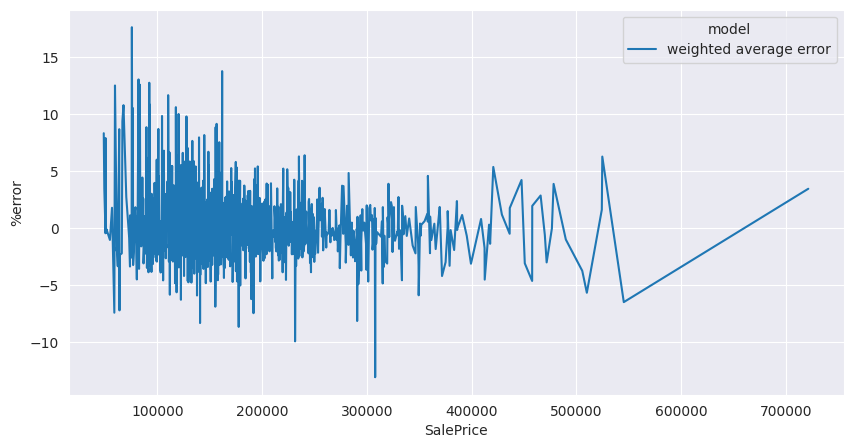

In [25]:
import pandas as pd
import seaborn as sns
from IPython import display
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [10, 5]

data = pd.read_csv("./submission.csv")
erikz = pd.read_csv("./submission-erik.csv")
mike_lasso = pd.read_csv("./mikes-lasso-predictions.csv")
mike_xgb = pd.read_csv("./mikes-xgb-predictions.csv")
mike_erik_xgb = pd.read_csv("./mikes-xgb-predictions-with-erik-data.csv")
erik_lasso = pd.read_csv("./eriks-lasso-predictions.csv")
erik_xgb = pd.read_csv("./eriks-xgb-predictions.csv")

data.insert(1, "mike lasso", mike_lasso["0"])
data.insert(1, "mike xgb", mike_xgb["0"])
data.insert(1, "mike erik xgb", mike_erik_xgb["0"])
data.insert(1, "erik lasso", erik_lasso["x"])
data.insert(1, "erik xgb", erik_xgb["x"])
data.insert(1, "erikz", erikz["SalePrice"])

data["weighted average error"] = (data["SalePrice"] - data["erikz"])* 2 / (data["SalePrice"] + data["erikz"]) * 100
data["lasso disagreement"] = (data["mike lasso"] - data["erik lasso"])* 2 / (data["mike lasso"] + data["erik lasso"]) * 100
data["xgb disagreement"] = (data["mike xgb"] - data["erik xgb"])* 2 / (data["mike xgb"] + data["erik xgb"]) * 100
data["xgb internal disagreement"] = (data["mike erik xgb"] - data["mike xgb"])* 2 / (data["mike erik xgb"] + data["mike xgb"]) * 100
data["xgb disagreement (with erik's data)"] = (data["mike erik xgb"] - data["erik xgb"])* 2 / (data["mike erik xgb"] + data["erik xgb"]) * 100

data = data.melt(
    id_vars=["SalePrice", "Id"],
    value_vars=[
        "weighted average error",
        "lasso disagreement",
        "xgb disagreement",
        "xgb internal disagreement",
        "xgb disagreement (with erik's data)",
    ],
    var_name="model",
    value_name="%error",
)

display.display(data)
# sns.lineplot(data=data, x="SalePrice", y="%error", hue="model")
sns.lineplot(data=data[data["model"] == "weighted average error"], x="SalePrice", y="%error", hue="model")
sns.set_style("darkgrid")
print("TIL: XGB results can vary SUPER wildly when training/testing data only deviates after 14 figures!")
print("TIL: XGB results remain exactly the same between runs when data and parameters don't change")

In [27]:
mikez = pd.read_csv("./mike_all.csv").drop(["Id", "SalePrice"], axis=1)
erikz = pd.read_csv("./erik_all.csv")

erikz_cols = ['X1stFlrSF', 'X2ndFlrSF', 'X3SsnPorch', 'Age', 'AlleyPave', 'AlleyNone', 'BedroomAbvGr', 'BldgType2fmCon', 'BldgTypeDuplex', 'BldgTypeTwnhs', 'BldgTypeTwnhsE', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1Feedr', 'Condition1Norm', 'Condition1PosN', 'Condition1RRAe', 'Condition1RRAn', 'Condition2Norm', 'ElectricalFuseF', 'ElectricalSBrkr', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1stBrkFace', 'Exterior1stCemntBd', 'Exterior1stHdBoard', 'Exterior1stMetalSd', 'Exterior1stPlywood', 'Exterior1stStucco', 'Exterior1stVinylSd', 'Exterior1stWd Sdng', 'Exterior1stWdShing', 'Exterior2ndBrkFace', 'Exterior2ndCmentBd', 'Exterior2ndHdBoard', 'Exterior2ndImStucc', 'Exterior2ndMetalSd', 'Exterior2ndPlywood', 'Exterior2ndStucco', 'Exterior2ndVinylSd', 'Exterior2ndWd Sdng', 'Exterior2ndWd Shng', 'FenceGdWo', 'FenceMnPrv', 'FenceMnWw', 'FenceNone', 'FireplaceQu', 'Fireplaces', 'FoundationCBlock', 'FoundationPConc', 'FoundationSlab', 'FullBath', 'Functional', 'GarageCars', 'GarageFinish', 'GarageQual', 'GarageTypeAttchd', 'GarageTypeBasment', 'GarageTypeBuiltIn', 'GarageTypeDetchd', 'GarageTypeNo Garage', 'GrLivArea', 'HalfBath', 'HeatingGasW', 'HeatingGasA', 'HeatingQC', 'HouseStyle1.5Unf', 'HouseStyle1Story', 'HouseStyle2.5Unf', 'HouseStyle2Story', 'HouseStyleSFoyer', 'HouseStyleSLvl', 'IsNew', 'KitchenAbvGr', 'KitchenQual', 'LandContourHLS', 'LandContourLow', 'LandContourLvl', 'LandSlope', 'LotArea', 'LotConfigCulDSac', 'LotConfigFR2', 'LotConfigInside', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass1 story PUD 1946+', 'MSSubClass2 story PUD 1946+', 'MSSubClassPUD multilevel', 'MSSubClass2 family conversion', 'MSSubClass1 story 1946+', 'MSSubClass1 story 1945-', 'MSSubClass1,5 story unf', 'MSSubClass1,5 story fin', 'MSSubClass2 story 1946+', 'MSSubClass2 story 1945-', 'MSSubClass2,5 story all ages', 'MSSubClasssplit/multi level', 'MSSubClasssplit foyer', 'MSSubClassduplex all style/age', 'MSZoningFV', 'MSZoningRH', 'MSZoningRL', 'MSZoningRM', 'MasVnrArea', 'MasVnrType', 'MiscFeatureShed', 'MiscFeatureNone', 'MiscVal', 'MoSold10', 'MoSold11', 'MoSold12', 'MoSold2', 'MoSold3', 'MoSold4', 'MoSold5', 'MoSold6', 'MoSold7', 'MoSold8', 'MoSold9', 'NeighRich', 'NeighborhoodBrDale', 'NeighborhoodBrkSide', 'NeighborhoodClearCr', 'NeighborhoodCollgCr', 'NeighborhoodCrawfor', 'NeighborhoodEdwards', 'NeighborhoodGilbert', 'NeighborhoodIDOTRR', 'NeighborhoodMeadowV', 'NeighborhoodMitchel', 'NeighborhoodNAmes', 'NeighborhoodNWAmes', 'NeighborhoodNoRidge', 'NeighborhoodNridgHt', 'NeighborhoodOldTown', 'NeighborhoodSWISU', 'NeighborhoodSawyer', 'NeighborhoodSawyerW', 'NeighborhoodSomerst', 'NeighborhoodStoneBr', 'NeighborhoodTimber', 'NeighborhoodVeenker', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'TotalPorchSF', 'Remod', 'RoofMatlCompShg', 'RoofMatlTar&Grv', 'RoofStyleGable', 'RoofStyleGambrel', 'RoofStyleHip', 'SaleConditionAlloca', 'SaleConditionFamily', 'SaleConditionNormal', 'SaleConditionPartial', 'SaleTypeNew', 'SaleTypeWD', 'ScreenPorch', 'Street', 'TotBathrooms', 'TotRmsAbvGrd', 'TotalSqFeet', 'WoodDeckSF', 'YearBuilt', 'YrSold2007', 'YrSold2008', 'YrSold2009', 'YrSold2010']

max_diff = 0
for mike_col, erik_col in zip(sorted(mikez.columns), erikz_cols):
    if len(mikez[mike_col]) != len(erikz[erik_col]):
        print("length mismatch", mike_col, erik_col)
        assert(False)
    if not any((mikez[mike_col] == erikz[erik_col]).tolist()):
        # print("match", mike_col, erik_col)
        continue
    for i in range(len(mikez[mike_col])):
        max_diff = max(max_diff, abs(mikez[mike_col].iloc[i] - erikz[erik_col].iloc[i]))
        if abs(mikez[mike_col].iloc[i] - erikz[erik_col].iloc[i]) > 1e-6:
            print(
                f"value mismatch mikez[{mike_col}].iloc[{i}] = {mikez[mike_col].iloc[i]}",
                f"!= erikz[{erik_col}].iloc[{i}] = {erikz[erik_col].iloc[i]}"
            )
            assert(False)
print("training & testing tables fully match up to", max_diff)
    

training & testing tables fully match up to 9.14823772291129e-14


In [18]:
mikez = pd.read_csv("./mike_train.csv")
prices = pd.read_csv("./erik-train-price.csv")
prices.insert(1, "mike price", mikez["SalePrice"])
print("Prices match up to", max(prices["x"] - prices["mike price"]))

Prices match up to 4.973799150320701e-14


In [24]:
# merge erik training data & price into
mikez = pd.read_csv("./mike_train.csv")
erik_prices = pd.read_csv("./erik-train-price.csv")
erik_test = pd.read_csv("./erik_test.csv")
erik = pd.read_csv("./erik_train.csv")

erik["SalePrice"] = prices["x"]
erik["Id"] = mikez["Id"]
erik["SalePrice"]
erik = pd.concat([erik, erik_test])
erik.to_csv("erik_all.csv", index=False)

brutal quantiles 54891.34648545909 447553.79039150476


,Id,SalePrice,shifted,diff
0,1461,115730.579143,116556.754689,826.175546
1,1462,161451.503311,161278.278112,-173.225199
2,1463,180862.360576,181522.146857,659.786281
3,1464,195036.885804,194683.488258,-353.397546
4,1465,194153.472606,195022.449863,868.977257
...,...,...,...,...
1454,2915,85083.325947,85278.994080,195.668133
1455,2916,81561.074707,81026.876000,-534.198706
1456,2917,166036.696852,165786.286271,-250.410581
1457,2918,120053.491890,120396.528150,343.036261


/tmp/ipykernel_16998/4023713758.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


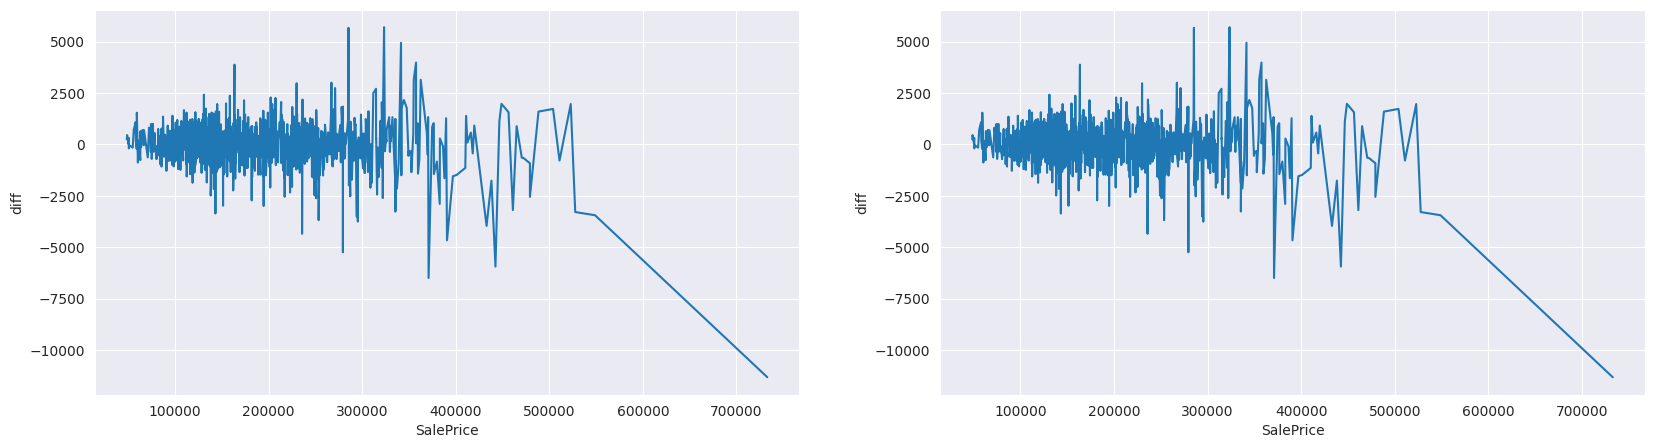

In [33]:
# compare pre-shifted to post-shifted data

plt.rcParams['figure.figsize'] = [20, 5]
data = pd.read_csv("./submission-without-shift.csv")
data = pd.read_csv("./submission-pre-shift-submission.csv")
print("brutal quantiles", data.SalePrice.quantile(.0042), data.SalePrice.quantile(.99))
shifted = pd.read_csv("./submission.csv")
b4 = pd.read_csv("./submission-pre-shift-submission.csv")
data.insert(2, "shifted", shifted["SalePrice"])
data["diff"] = data.apply(lambda x: x["shifted"] - x["SalePrice"], axis=1)

display.display(data)

fig, ax =plt.subplots(1,2)

sns.lineplot(data=data, x="SalePrice", y="diff", ax=ax[0])
sns.lineplot(data=data, x="SalePrice", y="diff", ax=ax[1])

fig.show()